In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 8})

# LOAD DATA

In [2]:
train = pd.read_csv('./Data/train_clean.csv') 

In [3]:
train.head()

,Unnamed: 0,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AgeWhenSold,YrsSinceRemodel
0,0,0,1,60,RL,65.0,8450,Pave,NoAlley,Reg,...,NoFence,None,0,2,2008,WD,Normal,208500,5,5
1,1,1,2,20,RL,80.0,9600,Pave,NoAlley,Reg,...,NoFence,None,0,5,2007,WD,Normal,181500,31,31
2,2,2,3,60,RL,68.0,11250,Pave,NoAlley,IR1,...,NoFence,None,0,9,2008,WD,Normal,223500,7,6
3,3,3,4,70,RL,60.0,9550,Pave,NoAlley,IR1,...,NoFence,None,0,2,2006,WD,Abnorml,140000,91,36
4,4,4,5,60,RL,84.0,14260,Pave,NoAlley,IR1,...,NoFence,None,0,12,2008,WD,Normal,250000,8,8


In [4]:
train = train.drop('Unnamed: 0', axis=1)
train = train.drop('index', axis=1)

In [5]:
# I have to do this again
# Ensure these variabes are categorical
train['MSSubClass'] = train['MSSubClass'].astype(str)
train['OverallQual'] = train['OverallQual'].astype(str)
train['OverallCond'] = train['OverallCond'].astype(str)

train['MoSold'] = train['MoSold'].astype(str)
train['YrSold'] = train['YrSold'].astype(str)
train['YearBuilt'] = train['YearBuilt'].astype(str)
      
train['YearRemodAdd'] = train['YearRemodAdd'].astype(str)
train['GarageYrBlt'] = train['GarageYrBlt'].astype(str)

In [6]:
train.shape[0]

1453

In [7]:
train.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [8]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AgeWhenSold,YrsSinceRemodel
0,1,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,...,NoFence,None,0,2,2008,WD,Normal,208500,5,5
1,2,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,...,NoFence,None,0,5,2007,WD,Normal,181500,31,31
2,3,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,...,NoFence,None,0,9,2008,WD,Normal,223500,7,6
3,4,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,...,NoFence,None,0,2,2006,WD,Abnorml,140000,91,36
4,5,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,...,NoFence,None,0,12,2008,WD,Normal,250000,8,8


# The Variables

In [9]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_train = train.select_dtypes(include=numerics)
numlist = list(num_train)
print(len(numlist),' numerical variables')
print(list(numlist))

32  numerical variables
['Id', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'AgeWhenSold', 'YrsSinceRemodel']


In [10]:
cattypes = ['O']
cat_train = train.select_dtypes(include=cattypes)
catlist = list(cat_train)
print(len(catlist),' categorical variables')
print(catlist)

51  categorical variables
['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


# Preprocessing 

#### 1. Separate the input and output variable(s)

In [11]:
# Remove 'SalePrice' from the numlist
numlist.remove('SalePrice')
numlist.remove('Id')

print(len(numlist),' numerical variables')
print(numlist)

30  numerical variables
['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'AgeWhenSold', 'YrsSinceRemodel']


In [12]:
# catlist_short = ['Neighborhood','ExterQual','KitchenQual']
catlist_short = ['ExterQual']

In [13]:
# CONCATENATE!! the numerical and categorical
#inputs_vars = numlist + catlist_short
inputs_vars = numlist 
print(inputs_vars)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'AgeWhenSold', 'YrsSinceRemodel']


In [14]:
PriceFeatures = train[inputs_vars].copy()

In [15]:
Price = train['SalePrice']

#### 2. Transform and/or Standardize

In [16]:
log_Price = np.log(train['SalePrice'])

Text(0.5, 0, 'log of SalePrice')

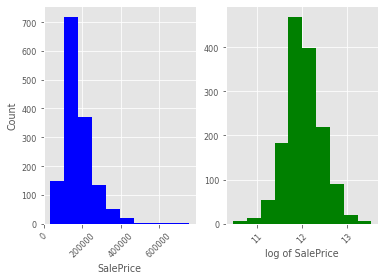

In [17]:
fig, axs = plt.subplots(1,2)   
axs[0].hist(Price,color='b')
axs[0].tick_params(axis='x', rotation=45)
axs[0].set_ylabel('Count')
axs[0].set_xlabel('SalePrice')
    
axs[1].hist(log_Price,color='g')
axs[1].tick_params(axis='x', rotation=45)
axs[1].set_xlabel('log of SalePrice')

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    PriceFeatures, log_Price, test_size=0.2, 
    random_state=0)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<ipython-input-20-dd80795d6a91>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1,2)


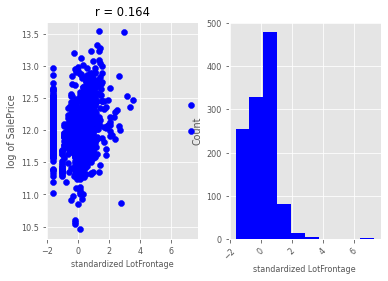

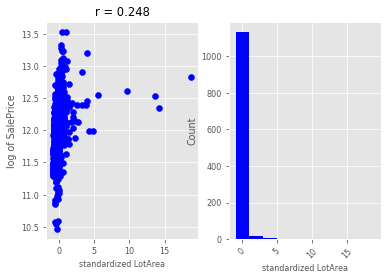

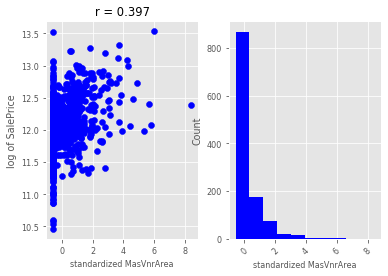

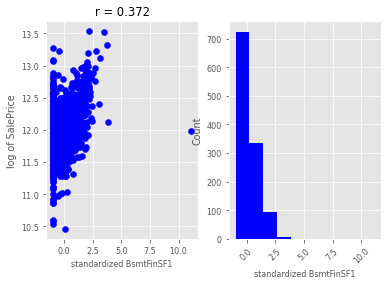

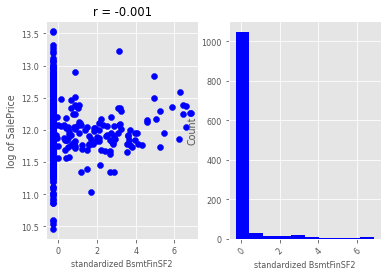

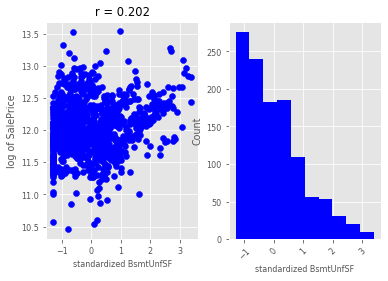

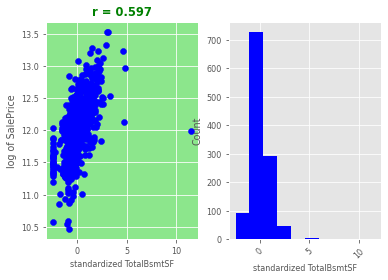

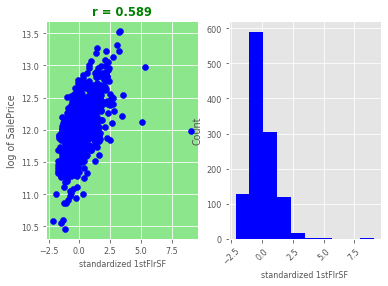

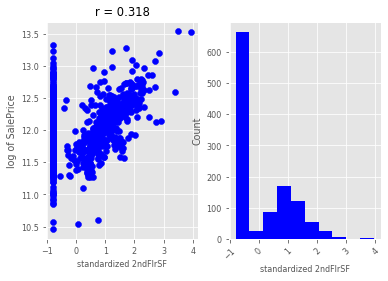

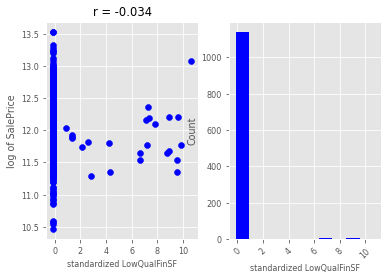

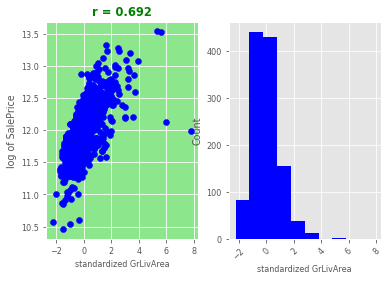

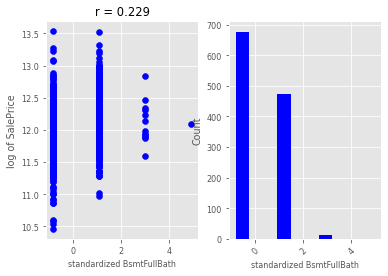

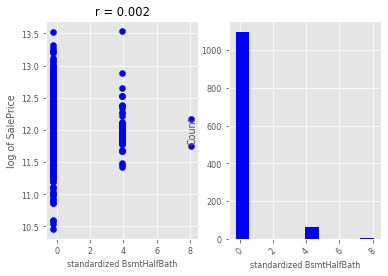

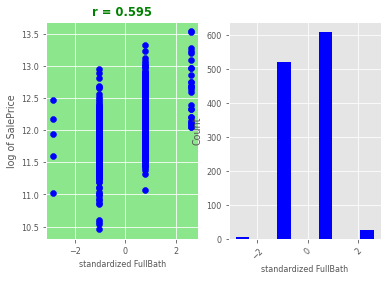

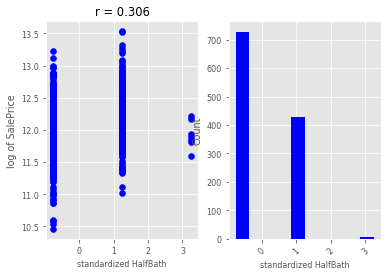

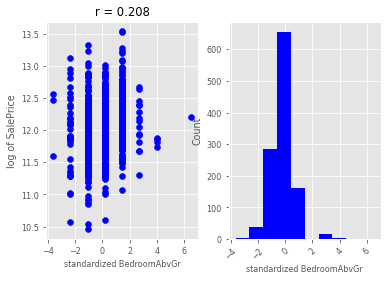

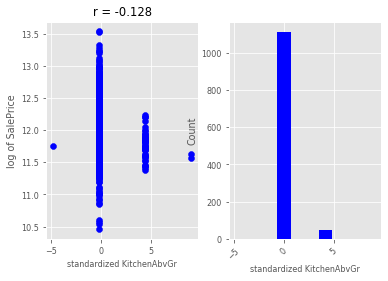

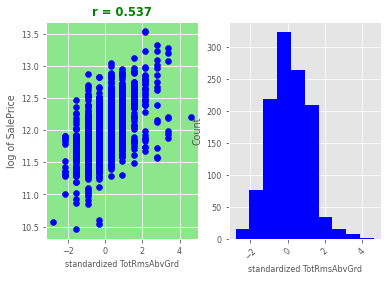

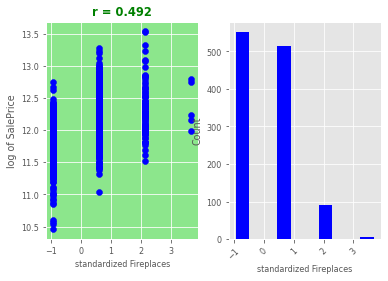

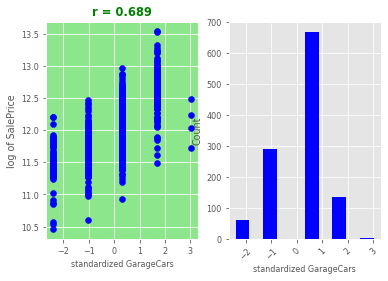

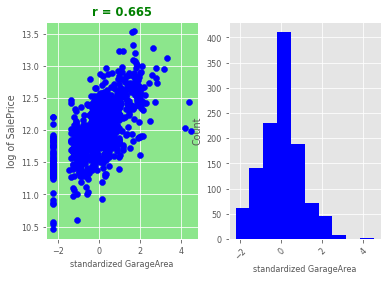

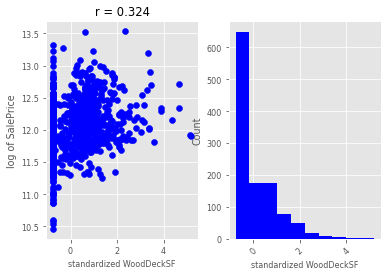

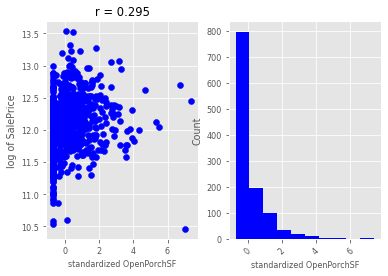

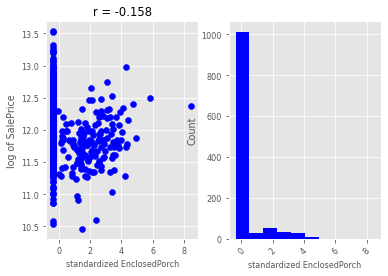

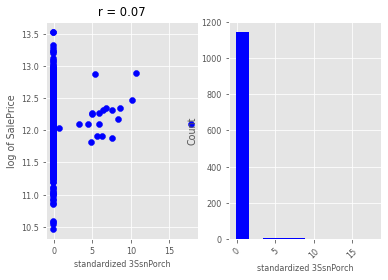

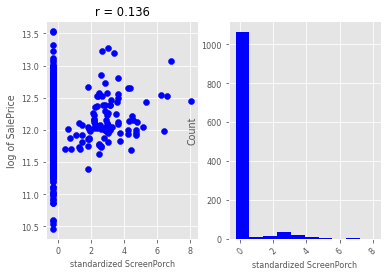

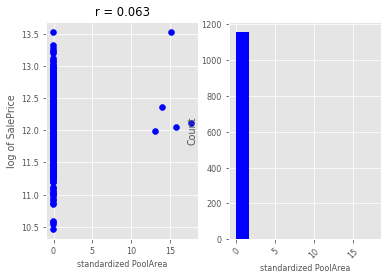

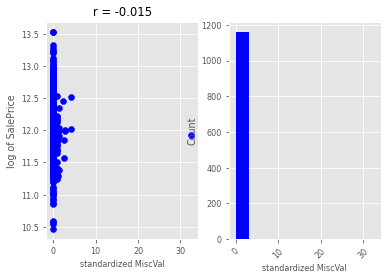

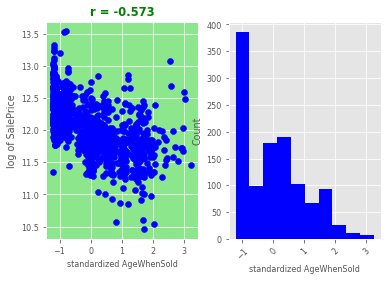

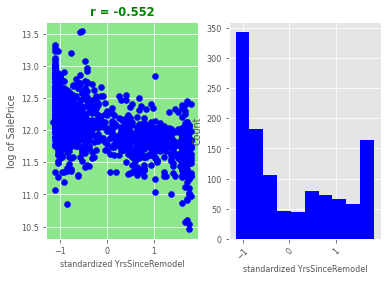

In [20]:
import numpy.ma as ma # need this to allow corrcoef to handle the nan rows

# correlation threshold, used to highlight particular figures 
corr_thrshld = 0.4

fcnt = 0
for Feat in PriceFeatures.columns:
    fig, axs = plt.subplots(1,2) 
    x = X_train_scaled[:,fcnt]
    y = y_train
    
    axs[0].scatter(x,y,color='b')
    axs[0].set_xlabel('standardized ' + Feat,fontsize = 8)
    axs[0].set_ylabel('log of SalePrice')
    fcnt +=1
    
    r = ma.corrcoef(ma.masked_invalid(x), 
                ma.masked_invalid(y))
    
    if np.abs(r[0,1]) >= corr_thrshld:
        axs[0].set_title(('r = '+ str(round(r[0,1],3))), fontweight = 'bold',color='g')
        axs[0].set_facecolor('#8ce68c')
        
    elif np.abs(r[0,1]) < corr_thrshld:
        axs[0].set_title(('r = ' + str(round(r[0,1],3))))
        
    
    # Histogram
    axs[1].hist(x,color='b')
    axs[1].tick_params(axis='x', rotation=45)
    axs[1].set_ylabel('Count')
    axs[1].set_xlabel('standardized ' + Feat,fontsize = 8)

### Dummify

In [ ]:
#PriceFeatures.groupby(['Neighborhood']).size().sort_values(ascending=False)

In [ ]:
#dummy = pd.get_dummies(PriceFeatures['Neighborhood'], prefix='Neighborhood')
#dummy

In [ ]:
#dummy.drop('Neighborhood_NAmes', axis=1, inplace=True) 

In [ ]:
#PriceFeatures = PriceFeatures.drop('Neighborhood', axis=1)  # drop the original Neighborhood feature
#PriceFeatures = pd.concat([PriceFeatures, dummy], axis=1) # concat PriceFeatures and dummy horizontally
#PriceFeatures.head()

# Baseline Model: Linear Regression

R^2 for train is equal to 0.814
R^2 for test is equal to 0.841
RSS is equal to 34.058
The intercept is 12.024
The slopes are [-3.82930207e-03  1.31187127e-02  3.42765177e-03 -4.07382481e+10
 -1.37282245e+10 -3.80794197e+10  3.82855795e+10 -5.65615574e+11
 -6.33316058e+11 -7.71743113e+10  7.68097817e+11  3.32952253e-02
  8.78433804e-03  2.27400784e-02  9.78626059e-03 -8.21925596e-03
 -4.17810722e-02  5.23143816e-02  4.65152565e-02  6.82192451e-02
  1.80936967e-02  1.37550940e-02 -7.67219174e-03  1.01049613e-02
  1.17691084e-02  2.56979719e-02 -2.14221319e-02  7.13498034e-03
 -6.80608646e-02 -6.51068306e-02]


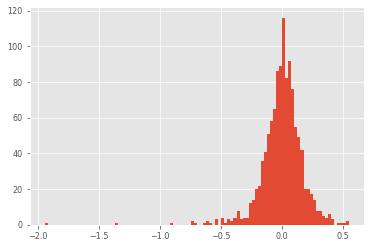

In [21]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train_scaled, y_train)
residuals = y_train - lm.predict(X_train_scaled)
plt.hist(residuals,bins=100);
print('R^2 for train is equal to %.3f' %(lm.score(X_train_scaled, y_train)))
print('R^2 for test is equal to %.3f' %(lm.score(X_test_scaled, y_test)))
print('RSS is equal to %.3f' %(np.sum((lm.predict(X_train_scaled) - y_train) ** 2)))
print('The intercept is %.3f' %(lm.intercept_))
print('The slopes are %s' %(lm.coef_))

In [22]:
pd.Series(lm.coef_, index=PriceFeatures.columns)

LotFrontage       -3.829302e-03
LotArea            1.311871e-02
MasVnrArea         3.427652e-03
BsmtFinSF1        -4.073825e+10
BsmtFinSF2        -1.372822e+10
BsmtUnfSF         -3.807942e+10
TotalBsmtSF        3.828558e+10
1stFlrSF          -5.656156e+11
2ndFlrSF          -6.333161e+11
LowQualFinSF      -7.717431e+10
GrLivArea          7.680978e+11
BsmtFullBath       3.329523e-02
BsmtHalfBath       8.784338e-03
FullBath           2.274008e-02
HalfBath           9.786261e-03
BedroomAbvGr      -8.219256e-03
KitchenAbvGr      -4.178107e-02
TotRmsAbvGrd       5.231438e-02
Fireplaces         4.651526e-02
GarageCars         6.821925e-02
GarageArea         1.809370e-02
WoodDeckSF         1.375509e-02
OpenPorchSF       -7.672192e-03
EnclosedPorch      1.010496e-02
3SsnPorch          1.176911e-02
ScreenPorch        2.569797e-02
PoolArea          -2.142213e-02
MiscVal            7.134980e-03
AgeWhenSold       -6.806086e-02
YrsSinceRemodel   -6.510683e-02
dtype: float64

In [23]:
#print('negative slope column names %s' %(PriceFeatures.columns[lm.coef_<0]))
#print('positive slope column names %s' %(PriceFeatures.columns[lm.coef_>0]))

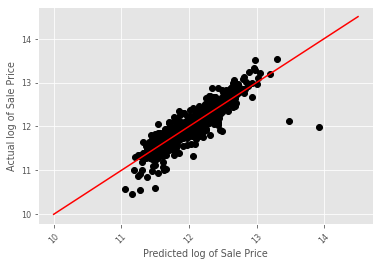

In [24]:
plt.plot(lm.predict(X_train_scaled), 
         y_train, 'ko')
#x = np.linspace(0, 800000, 1000)
#y = np.linspace(0, 800000, 1000)
x = np.linspace(10, 14.5, 100)
y = np.linspace(10, 14.5, 100)
plt.plot(x,y, 'r-')

plt.ylabel('Actual log of Sale Price')
plt.xlabel('Predicted log of Sale Price')
plt.xticks(rotation = 45); # Rotates X-Axis Ticks by 45-degrees

# Model Lasso - No Grid Search

In [25]:
from sklearn.linear_model import Lasso

In [30]:
lasso  = Lasso()
lasso.set_params(normalize=False)
lasso_scores_train = []
lasso_scores_test  = []

alphas = [0, 0.0001, 0.001, 0.010, 0.10, 1, 1.25]
coefs_lasso  = []

for alpha in alphas:
        lasso.set_params(alpha=alpha)
        lasso.fit(X_train_scaled, y_train)  
        coefs_lasso.append(lasso.coef_)
        
        lasso_scores_train.append(lasso.score(X_train_scaled, y_train))
        lasso_scores_test.append(lasso.score(X_test_scaled, y_test))

coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = PriceFeatures.columns)  
coefs_lasso.head()

<ipython-input-30-e7767105dc86>:11: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train_scaled, y_train)
/Users/flyingcape/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/flyingcape/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.030571195008733, tolerance: 0.018268170942427674
  model = cd_fast.enet_coordinate_descent(
/Users/flyingcape/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.057794

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,AgeWhenSold,YrsSinceRemodel
0.0000,-0.003635,0.013120,0.003182,0.035476,0.01136,0.031407,0.019738,0.068072,0.074042,0.004167,...,0.018174,0.013898,-0.007425,0.009966,0.011672,0.025852,-0.021360,0.007108,-0.068152,-0.064974
0.0001,-0.003530,0.013043,0.003161,0.001907,0.00000,-0.000000,0.051198,0.028529,0.029648,-0.001132,...,0.018107,0.013869,-0.007228,0.009790,0.011573,0.025724,-0.021252,0.007008,-0.068114,-0.064989
0.0010,-0.002529,0.012357,0.002977,0.002366,0.00000,-0.000000,0.050930,0.001436,0.000000,-0.003870,...,0.017653,0.013604,-0.005490,0.008172,0.010729,0.024551,-0.020331,0.006111,-0.067853,-0.065128
0.0100,-0.000000,0.006594,0.000000,0.003178,0.00000,-0.000000,0.048341,0.000000,0.000000,-0.000000,...,0.013455,0.009620,-0.000000,0.000000,0.001947,0.015051,-0.010074,0.000000,-0.066866,-0.063451
0.1000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.030590,0.000000,0.000000,-0.000000,...,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.038657,-0.024427


In [31]:
lasso_scores_train = np.array(lasso_scores_train) 
lasso_scores_test  = np.array(lasso_scores_test)

Text(0, 0.5, '$R^2$')

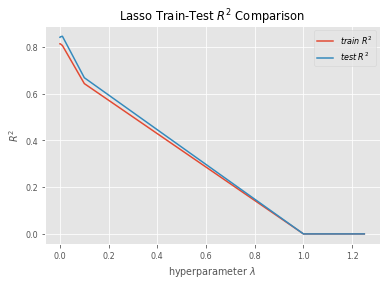

In [32]:
plt.plot(alphas, lasso_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, lasso_scores_test, label=r'$test\ R^2$')
plt.title(r'Lasso Train-Test $R^2$ Comparison')
lasso_underfit = lasso_scores_train < lasso_scores_test
#last_underfit  = np.max(alphas[lasso_underfit])
#plt.axvline(last_underfit, linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

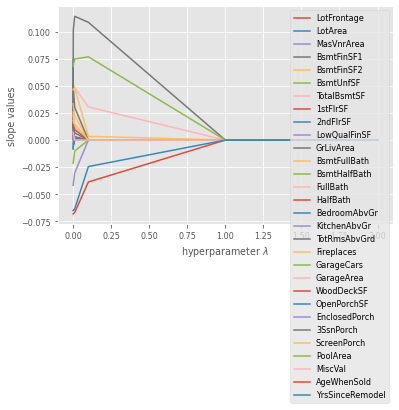

In [29]:
for name in coefs_lasso.columns:
    plt.plot(coefs_lasso.index, coefs_lasso[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')
plt.legend(loc=1)   

# Single Lasso

In [37]:
lasso  = Lasso()
lasso.set_params(normalize=False)
lasso.set_params(alpha=0.010)
lasso.fit(X_train_scaled, y_train)  

Lasso(alpha=0.01)

In [38]:
lasso.score(X_train_scaled, y_train)


0.8061852781954859

In [39]:
lasso.score(X_test_scaled, y_test)

0.8457292722760638

In [40]:
pd.Series(lasso.coef_, index=PriceFeatures.columns)

LotFrontage       -0.000000
LotArea            0.006594
MasVnrArea         0.000000
BsmtFinSF1         0.003178
BsmtFinSF2         0.000000
BsmtUnfSF         -0.000000
TotalBsmtSF        0.048341
1stFlrSF           0.000000
2ndFlrSF           0.000000
LowQualFinSF      -0.000000
GrLivArea          0.114186
BsmtFullBath       0.022406
BsmtHalfBath       0.000000
FullBath           0.011880
HalfBath           0.000000
BedroomAbvGr       0.000000
KitchenAbvGr      -0.030305
TotRmsAbvGrd       0.030159
Fireplaces         0.048262
GarageCars         0.074781
GarageArea         0.013455
WoodDeckSF         0.009620
OpenPorchSF       -0.000000
EnclosedPorch      0.000000
3SsnPorch          0.001947
ScreenPorch        0.015051
PoolArea          -0.010074
MiscVal            0.000000
AgeWhenSold       -0.066866
YrsSinceRemodel   -0.063451
dtype: float64

# Model 2: Lasso

In [33]:
from sklearn.utils.multiclass import type_of_target
print(type_of_target(y_train))
print(type_of_target(Price))

continuous
multiclass


In [34]:
from sklearn.linear_model import Lasso

In [35]:
# Grid Search 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

skfold = KFold(n_splits=3, shuffle=True, random_state=0)
lasso_gs  = Lasso()
lasso_gs.set_params(normalize=False)

params = {
    "alpha": [0, 0.0001, 0.001, 0.010, 0.10, 1, 1.25]
}

gs = GridSearchCV(lasso_gs, params, scoring = 'r2', cv=skfold)
gs.fit(X_train_scaled, y_train)
gs.cv_results_['mean_test_score']

/Users/flyingcape/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/flyingcape/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/flyingcape/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.446318180799722, tolerance: 0.011369688913002244
  model = cd_fast.enet_coordinate_descent(
/Users/flyingcape/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: UserWarning: With alpha=0, this algorithm does no

array([ 7.62447360e-01,  7.62768794e-01,  7.64431109e-01,  7.73355269e-01,
        6.42321474e-01, -1.96349955e-04, -1.96349955e-04])

In [36]:
gs.best_estimator_

Lasso(alpha=0.01)

In [ ]:
# gs.best_estimator_.score

In [ ]:
# print('R^2 is equal to %.3f' %(lm.score(PriceFeatures, Price)))

In [ ]:
pd.Series(gs.best_estimator_.coef_, index=PriceFeatures.columns)

In [ ]:
#plt.plot(lm.predict(X_train_scaled), 
#         y_train, 'ko')
plt.plot(gs.best_estimator_.predict(X_train_scaled), # new model
         y_train, 'b*')
x = np.linspace(10, 15, 1000)
y = np.linspace(10, 15, 1000)
plt.plot(x,y, 'r-')

plt.ylabel('Actual Sale Price')
plt.xlabel('Predicted Sale Price')
plt.xticks(rotation = 45); # Rotates X-Axis Ticks by 45-degrees

In [ ]:
#lasso  = Lasso()
#lasso.get_params().keys()

# Model 3: Random Forest

In [45]:
X_train_scaled.shape

(1162, 30)

In [46]:
from sklearn import ensemble
randomForest = ensemble.RandomForestRegressor()
randomForest.set_params(random_state=42, 
                        n_estimators=100, 
                        max_features=30)

randomForest.fit(X_train_scaled, y_train)

RandomForestRegressor(max_features=30, random_state=42)

In [47]:
randomForest.criterion

'mse'

In [48]:
randomForest.score(X_train_scaled, y_train)

0.9775461875465378

In [49]:
print(randomForest.feature_importances_)

[8.22280604e-03 2.94021917e-02 4.84764623e-03 2.83928310e-02
 2.18476821e-03 1.29769094e-02 6.56081747e-02 3.80194337e-02
 1.02507445e-02 4.06967477e-04 3.41924909e-01 1.88532211e-03
 6.27029980e-04 5.57317529e-03 2.70430534e-03 4.93764837e-03
 5.52574856e-03 7.72689046e-03 2.37137363e-02 9.06528125e-02
 6.43411222e-02 5.56342914e-03 9.53881884e-03 3.75896598e-03
 3.46868516e-04 1.22009781e-03 1.58586669e-04 6.44513193e-04
 1.88284428e-01 4.05591195e-02]


In [54]:
sorted_importance = sorted(zip(PriceFeatures, randomForest.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance

[('GrLivArea', 0.3419249088344992),
 ('AgeWhenSold', 0.18828442767528794),
 ('GarageCars', 0.09065281250064611),
 ('TotalBsmtSF', 0.0656081747110082),
 ('GarageArea', 0.06434112217351047),
 ('YrsSinceRemodel', 0.04055911945807937),
 ('1stFlrSF', 0.0380194336682966),
 ('LotArea', 0.029402191653151128),
 ('BsmtFinSF1', 0.028392830976239528),
 ('Fireplaces', 0.023713736257145606),
 ('BsmtUnfSF', 0.012976909360819406),
 ('2ndFlrSF', 0.010250744518706846),
 ('OpenPorchSF', 0.009538818841704398),
 ('LotFrontage', 0.008222806035420409),
 ('TotRmsAbvGrd', 0.007726890459368409),
 ('FullBath', 0.005573175292373914),
 ('WoodDeckSF', 0.0055634291387229775),
 ('KitchenAbvGr', 0.005525748561517534),
 ('BedroomAbvGr', 0.004937648374752227),
 ('MasVnrArea', 0.0048476462291611325),
 ('EnclosedPorch', 0.0037589659839317204),
 ('HalfBath', 0.0027043053388429504),
 ('BsmtFinSF2', 0.0021847682059599853),
 ('BsmtFullBath', 0.0018853221065702017),
 ('ScreenPorch', 0.001220097808149735),
 ('MiscVal', 0.000644

# Model 4: Gradient Boosting

In [50]:
import sklearn.ensemble
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor()

In [51]:
gbm.fit(X_train_scaled, y_train)

GradientBoostingRegressor()

In [52]:
gbm.score(X_train_scaled, y_train)

0.9300712852838363

In [53]:
sorted_importance = sorted(zip(PriceFeatures, gbm.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance

[('GrLivArea', 0.3295020047372396),
 ('AgeWhenSold', 0.1822788246172875),
 ('GarageCars', 0.10478842134272755),
 ('TotalBsmtSF', 0.08694350880921814),
 ('Fireplaces', 0.06745304642545799),
 ('YrsSinceRemodel', 0.054415111835929966),
 ('GarageArea', 0.05117574597396292),
 ('BsmtFinSF1', 0.033698564872291475),
 ('LotArea', 0.024291045717169092),
 ('1stFlrSF', 0.015899029392944034),
 ('2ndFlrSF', 0.009686844065506616),
 ('OpenPorchSF', 0.006921759268697152),
 ('TotRmsAbvGrd', 0.006571188433828729),
 ('HalfBath', 0.004568796908802073),
 ('KitchenAbvGr', 0.004373659742377687),
 ('WoodDeckSF', 0.003143629477622586),
 ('ScreenPorch', 0.0028147711196100504),
 ('BedroomAbvGr', 0.0026019595501894336),
 ('BsmtUnfSF', 0.00225825094833893),
 ('LotFrontage', 0.0014031106528987264),
 ('BsmtFullBath', 0.001291279584738837),
 ('BsmtFinSF2', 0.0012618502950123864),
 ('EnclosedPorch', 0.0008223444834116205),
 ('MasVnrArea', 0.0008204928748648219),
 ('LowQualFinSF', 0.00025524776156817284),
 ('3SsnPorch',